In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
import gurobipy

# Make MSS_WoL

In [6]:
def Make_MSS_WoL(Stages, Initial_state, Gradient, Costs):
    """
    Stages = Int
    Initial_state = [Houses, Gatherers, Workers, Resources]
    Gradient      = [Army/Barrack, Buildings/Worker, Peasants/House, Supplies/House, Production/Gatherer]
    Cotst         = [ ]
    
    
                    """
    
    Army       = cvx.Variable(Stages, name = 'Army', pos = True)
    Workers    = cvx.Variable(Stages, name = 'Workers', pos = True)
    Gatherers  = cvx.Variable(Stages, name = 'Gatherers', pos = True)
    Resources  = cvx.Variable(Stages, name = 'Resources', pos = True)
    Houses     = cvx.Variable(Stages, name = 'Houses', pos = True)
    Barracks   = cvx.Variable(Stages, name = 'Barracks', pos = True)
    Archers    = cvx.Variable(Stages, name = 'Archers', pos = True)
    Knights    = cvx.Variable(Stages, name = 'Knights', pos = True)
#    Mages      = cvx.Variable(Stages, name = 'Mages', pos = True)

    
    A = cvx.Variable(Stages-1, name = 'Archers Production', pos = True)
    B = cvx.Variable(Stages-1, name = 'Barracks Production', pos = True)
    G = cvx.Variable(Stages-1, name = 'Gatherers Production', pos = True)
    H = cvx.Variable(Stages-1, name = 'Houses Production', pos = True)
    K = cvx.Variable(Stages-1, name = 'Knights Production', pos = True)
#    M = cvx.Variable(Stages-1, name = 'Mages Production', pos = True)
    W = cvx.Variable(Stages-1, name = 'Workers Production', pos = True)
    
    initial_gatherers = cvx.Parameter()
    initial_houses    = cvx.Parameter()
    initial_workers   = cvx.Parameter()
    initial_resources = cvx.Parameter()
    
    army_barracks       = cvx.Parameter()
    buildings_workers   = cvx.Parameter()
    peasants_houses     = cvx.Parameter()
    army_building       = cvx.Parameter()
    supplies_houses     = cvx.Parameter()
    production_gatherer = cvx.Parameter()

    custo_archers   = cvx.Parameter()
    custo_barracks  = cvx.Parameter()
    custo_gatherers = cvx.Parameter()
    custo_houses    = cvx.Parameter()
    custo_knights   = cvx.Parameter()
    custo_workers   = cvx.Parameter()
    
    initial_houses, initial_gatherers, initial_workers, initial_resources = Initial_state
    army_barracks, buildings_workers, peasants_houses.value, supplies_houses.value, production_gatherer.value          = Gradient
    custo_archers.value, custo_barracks, custo_gatherers.value, custo_houses.value, custo_knights.value, custo_workers.value = Costs
    
    
    Constraints = [Archers[0]   == 0,
               Barracks[0]  == 0,
               Gatherers[0] == initial_gatherers,
               Houses[0]    == initial_houses,
               Knights[0]   == 0,
               Workers[0]   == initial_workers,
               Army[0]      == 0,
               Resources[0] == initial_resources,
               
               A >= 0,
               B >= 0,
               G >= 0,
               H >= 0,
               K >= 0,
               W >= 0]

    for i in range(Stages-1):

        Constraints.append(A[i]  == Archers[i+1]   - Archers[i])
        Constraints.append(B[i]  == Barracks[i+1]  - Barracks[i])
        Constraints.append(G[i]  == Gatherers[i+1] - Gatherers[i])
        Constraints.append(H[i]  == Houses[i+1]    - Houses[i])
        Constraints.append(K[i]  == Knights[i+1]   - Knights[i])
        Constraints.append(W[i]  == Workers[i+1]   - Workers[i])

        Constraints.append(A[i] + K[i] <= army_barracks*Barracks[i])
        Constraints.append(B[i] + H[i] <= buildings_workers*Workers[i])
        Constraints.append(G[i] + W[i] <= peasants_houses*Houses[i])

        Constraints.append(Army[i+1] == Archers[i+1] + Knights[i+1])
        Constraints.append(Army[i+1] 
                           + Gatherers[i+1] 
                           + Workers[i+1] <= Houses[i+1]*supplies_houses)

        Constraints.append(Resources[i+1] == Resources[i]
                           + production_gatherer*Gatherers[i]
                           - custo_archers*A[i] 
                           - custo_barracks*B[i]
                           - custo_gatherers*G[i]
                           - custo_houses*H[i]
                           - custo_knights*K[i]
                           - custo_workers*W[i])

        Constraints.append(Resources[i]   >= custo_archers*A[i] 
                           + custo_barracks*B[i]
                           + custo_gatherers*G[i]
                           + custo_houses*H[i]
                           + custo_knights*K[i]
                           + custo_workers*W[i])
        
    F_obj = cvx.Maximize(Army[-1])
    
    return cvx.Problem(F_obj, Constraints)

# MSS INTEGER WoL


In [7]:
def MIMSS_WoL(Stages, Initial_state, Gradient, Costs):
    """
    Stages = Int
    Initial_state = [Houses, Gatherers, Workers, Resources]
    Gradient      = [Army/Barrack, Buildings/Worker, Peasants/House, Supplies/House, Production/Gatherer]
    Cotst         = [ ]
    
    
                    """
    
    Army       = cvx.Variable(Stages, integer = True, name = 'Army')
    Workers    = cvx.Variable(Stages, integer = True, name = 'Workers')
    Gatherers  = cvx.Variable(Stages, integer = True, name = 'Gatherers')
    Resources  = cvx.Variable(Stages, integer = True, name = 'Resources')
    Houses     = cvx.Variable(Stages, integer = True, name = 'Houses')
    Barracks   = cvx.Variable(Stages, integer = True, name = 'Barracks')
    Archers    = cvx.Variable(Stages, integer = True, name = 'Archers')
    Knights    = cvx.Variable(Stages, integer = True, name = 'Knights')
    
    A = cvx.Variable(Stages-1, integer = True, name = 'Archers Production')
    B = cvx.Variable(Stages-1, integer = True, name = 'Barracks Production')
    G = cvx.Variable(Stages-1, integer = True, name = 'Gatherers Production')
    H = cvx.Variable(Stages-1, integer = True, name = 'Houses Production')
    K = cvx.Variable(Stages-1, integer = True, name = 'Knights Production')
    W = cvx.Variable(Stages-1, integer = True, name = 'Workers Production')
    
    initial_gatherers = cvx.Parameter()
    initial_houses    = cvx.Parameter()
    initial_workers   = cvx.Parameter()
    initial_resources = cvx.Parameter()
    
    army_barracks       = cvx.Parameter()
    buildings_workers   = cvx.Parameter()
    peasants_houses     = cvx.Parameter()
    army_building       = cvx.Parameter()
    supplies_houses     = cvx.Parameter()
    production_gatherer = cvx.Parameter()

    custo_archers   = cvx.Parameter()
    custo_barracks  = cvx.Parameter()
    custo_gatherers = cvx.Parameter()
    custo_houses    = cvx.Parameter()
    custo_knights   = cvx.Parameter()
    custo_workers   = cvx.Parameter()
    
    initial_houses, initial_gatherers, initial_workers, initial_resources = Initial_state
    army_barracks.value, buildings_workers.value, peasants_houses.value, supplies_houses.value, production_gatherer.value          = Gradient
    custo_archers.value, custo_barracks.value, custo_gatherers.value, custo_houses.value, custo_knights.value, custo_workers.value = Costs
    
    
    Constraints = [Archers[0]   == 0,
                   Barracks[0]  == 0,
                   Gatherers[0] == initial_gatherers,
                   Houses[0]    == initial_houses,
                   Knights[0]   == 0,
                   Workers[0]   == initial_workers,
                   Army[0]      == 0,
                   Resources[0] == initial_resources,
               
                   A >= 0,
                   B >= 0,
                   G >= 0,
                   H >= 0,
                   K >= 0,
                   W >= 0]

    for i in range(Stages-1):

        Constraints.append(A[i]  == Archers[i+1]   - Archers[i])
        Constraints.append(B[i]  == Barracks[i+1]  - Barracks[i])
        Constraints.append(G[i]  == Gatherers[i+1] - Gatherers[i])
        Constraints.append(H[i]  == Houses[i+1]    - Houses[i])
        Constraints.append(K[i]  == Knights[i+1]   - Knights[i])
        Constraints.append(W[i]  == Workers[i+1]   - Workers[i])

        Constraints.append(A[i] + K[i] <= army_barracks*Barracks[i])
        Constraints.append(B[i] + H[i] <= buildings_workers*Workers[i])
        Constraints.append(G[i] + W[i] <= peasants_houses*Houses[i])

        Constraints.append(Army[i+1] == Archers[i+1] + Knights[i+1])
        Constraints.append(Army[i+1] 
                           + Gatherers[i+1] 
                           + Workers[i+1] <= Houses[i+1]*supplies_houses)

        Constraints.append(Resources[i+1] == Resources[i]
                           + production_gatherer*Gatherers[i]
                           - custo_archers*A[i] 
                           - custo_barracks*B[i]
                           - custo_gatherers*G[i]
                           - custo_houses*H[i]
                           - custo_knights*K[i]
                           - custo_workers*W[i])

    #    Constraints.append(Resources[i+1] >= 0)

        Constraints.append(Resources[i]   >= custo_archers*A[i] 
                           + custo_barracks*B[i]
                           + custo_gatherers*G[i]
                           + custo_houses*H[i]
                           + custo_knights*K[i]
                           + custo_workers*W[i])
        
    F_obj = cvx.Maximize(Army[-1])
    
    return cvx.Problem(F_obj, Constraints)

# MSS WoL Plot

In [8]:
def MSS_WoL_plot(Stages, problem, save = False, Title = False, figname = False):
    
    Army,Archers,Barracks,Gatherers,Houses,Knights,Workers,Resources, *_ = problem.variables()
    
    plt.figure(figsize=(12,4))

######################  First Plot  ##################################

    plt.subplot(131)
    plt.plot(Archers.value[:Stages],'--*', label='Archers')
    plt.plot(Barracks.value[:Stages],'--*', label='Barracks')
    plt.plot(Gatherers.value[:Stages],'--*', label='Gatherers')
    plt.plot(Houses.value[:Stages],'--*', label='Houses')
    plt.plot(Knights.value[:Stages],'--*', label='Knights')

    plt.plot(Workers.value[:Stages],'o--', label='Workers')
    plt.plot(Resources.value[:Stages], label='Resources')
    if Title:
        plt.title(Title)
    else:
        plt.title(str(Stages) + ' Estágios')
    plt.legend()
    plt.xlabel('Stages')
    plt.grid(True)
    
######################  Second Plot  ##################################

    plt.subplot(132)
    plt.plot(Barracks.value[:Stages] + Houses.value[:Stages],'--*', label='Buildings')
    plt.plot(Archers.value[:Stages] + Knights.value[:Stages],'o--', label='Army')
    plt.plot(Workers.value[:Stages] + Gatherers.value[:Stages], label='Peasants')
    plt.plot(Resources.value[:Stages], label='Resources')
    if Title:
        plt.title(Title + ' - Logscale')
    else:
        plt.title(str(Stages) + 'Estágios - Logscale')
    plt.yscale('symlog')
    plt.xlabel('Stages')
    plt.grid(True)

    plt.legend()


######################  Third Plot  ##################################

    plt.subplot(133)
    plt.plot(Resources.value[:Stages],'o-', label = 'Resources')
    plt.plot(Army.value[:Stages], 'p-', label = 'Army')
    plt.legend()
    plt.yscale('symlog', linthreshy=0.015)
    plt.grid(True)
    plt.xlabel('Stages')
    plt.title('Army and Resources')
    plt.tight_layout()
    plt.show()

    #plt.plot(Army.value[:Stages], label='')
    #plt.plot(Max_supply.value[:Stages], label='')
    #plt.plot(B.value[:Stages], label='')
    #plt.plot(G.value[:Stages], label='')

    if save:
        if figname:
            
            plt.savefig(figname, bbox_inches = 'tight',pad_inches = 0)
        else:
            plt.savefig(str(Stages)+'_Estagios_'+str(mnum), bbox_incehs = 'tight', pad_inches = 0)

In [9]:
problem_wol = Make_MSS_WoL(12,[2,1,1,0],[2,1,2,3,2],[1,1,1,1,1,1])

In [10]:
int_problem_wol = MIMSS_WoL(12,[2,1,1,0],[2,1,2,3,2],[1,1,1,1,1,1])

In [11]:
%time problem_wol.solve(solver = 'GUROBI')

Academic license - for non-commercial use only
Wall time: 639 ms


164.01732882502117

In [12]:
%time int_problem_wol.solve(solver = 'GUROBI')

Wall time: 942 ms


156.0

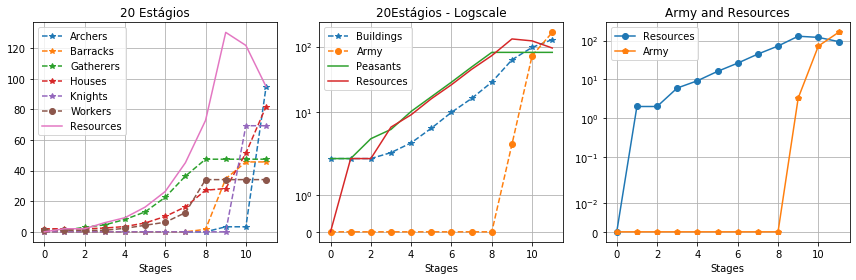

In [13]:
MSS_WoL_plot(20, problem_wol)

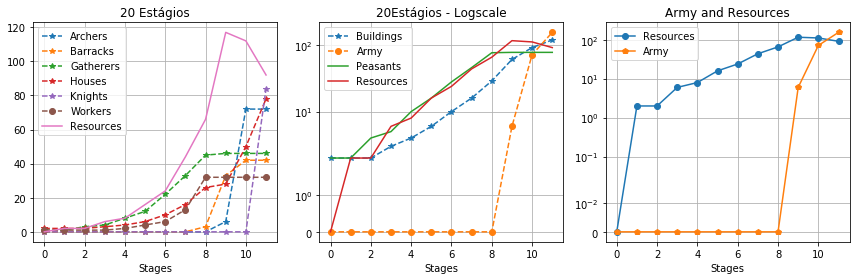

In [14]:
MSS_WoL_plot(20, int_problem_wol)

In [59]:
problem_wol.variables()[4].name(),problem_wol.variables()[4].value

('Houses',
 array([ 2.        ,  2.        ,  2.        ,  2.38461538,  3.46153846,
         5.76923077, 10.05494505, 16.31868132, 27.1978022 , 28.2967033 ,
        51.41377853, 81.87024514]))